# Tribunal Superior Eleitoral

<img src="Imagens/TSE.jpg">

# Introdução

***
Neste artigo, irei demostrar os presidentes que tiveram maior número de votos durante os anos, utilizando dados disponíveis da [Base dos Dados](https://basedosdados.org/) em python. Os dados Utilizados correspondem a dados do [Tribunal Eleitoral](https://basedosdados.org/dataset/br-tse-eleicoes) das eleições de 1998 a 2018. \
A partir deste artigo, espera-se que você conheça quais presidentes ganharam e quase ganharam as eleições perante os anos eleitorais.

In [3]:
# instalando pacote da base dos dados
!pip install basedosdados 

Com o pacote instalado iremos carregar todos os pacotes que utilizaremos em nossa análise.

In [13]:
# Importando Pacotes
import basedosdados as bd # importa dados da base dos dados
import pandas as pd # manipulação de dados
import seaborn as sns # criação de gráficos
import matplotlib.pyplot as plt # criações de gráficos
from matplotlib.pylab import rcParams # tamanho padrão
rcParams['figure.figsize'] = 15, 6

Feito a importação dos pacotes, agora iremos trazer os dados referentes aos candidatos perante os anos. Para isso, utilizaremos da função `read_sql` que permita que os dados possam ser trazidos via uma query em sql. Contudo, vamos adcionar a nossa query em uma várivel.

In [15]:
# Criando variável com a query em sql
query = """
SELECT 
  R.ano,
  R.turno,
  C.nome_urna as Candidatos,
  R.votos,
FROM `basedosdados.br_tse_eleicoes.resultados_candidato` R
LEFT OUTER JOIN `basedosdados.br_tse_eleicoes.candidatos` C
  ON  R.ano = C.ano
  AND R.cargo = C.cargo 
  AND R.numero_candidato   = C.numero  
WHERE R.cargo ='presidente'
  AND C.cargo = 'presidente'
  AND C.situacao = 'deferido'
ORDER BY R.ano, R.votos DESC
"""

Com a query montada, agora podemos carregar os dados via o comando `read_sql`.

In [16]:
# Carregando os dados
df = bd.read_sql(query, billing_project_id='carbide-legend-331517')

Downloading: 100%|██████████| 68/68 [00:00<00:00, 235.35rows/s]


Note que para o carregamento dos dados, tivemos que utilizar um `billing_project_id`. Para a obtenção deste código faz-se necessário um [projeto no google cloud](https://basedosdados.github.io/mais/access_data_bq/#primeiros-passos), conforme demonstra a Base dos Dados. Com os dados carregados, agora iremos verificar os dados disponíveis.

In [17]:
# Carregando as 5 primeiras linhas dos dados.
df.head()

,ano,turno,Candidatos,votos
0,1998,1,Fernando Henrique,35922534
1,1998,1,Lula,21470326
2,1998,1,Ciro Gomes,7424780
3,1998,1,Enéas,1446782
4,1998,1,Brigadeiro Ivan Frota,251275


In [18]:
# Número de linhas x colunas
linhas = df.shape[0] # linhas
colunas = df.shape[1]
print('Número de linhas = ',linhas)
print('Número de colunas = ', colunas)

Número de linhas =  68
Número de colunas =  4


In [19]:
# Verificando presença de valores duplicados
df.value_counts()

ano   turno  Candidatos             votos   
1998  1      Brigadeiro Ivan Frota  251275      1
2014  1      Eymael                 61250       1
             Rui Costa Pimenta      12324       1
             Pastor Everaldo        780513      1
             Mauro Iasi             47845       1
                                               ..
2006  2      Lula                   58295042    1
2010  1      Dilma                  47651434    1
             Eymael                 89350       1
             Ivan Pinheiro          39136       1
2018  2      Jair Bolsonaro         57797847    1
Length: 68, dtype: int64

Observe que dentro de nosso dataset temos 4 variáveis (Ano, Nome, Turno e Votos). Com os nossos dados corretamente tratados, iremos criar nossa visualização. Contudo, vamos ver quais anos tivemos eleição presencial dentro de nosso dataset.

In [21]:
Eleicoes = df['ano'].unique()
print(Eleicoes)

[1998 2002 2006 2010 2014 2018]


Agora que temos os anos com as eleções presidenciais, iremos criar uma função que traz um gráfico de barras com os top eleitores de acordo com o ano selecionado.

In [27]:
def top_candidados_ano(ano):
    if ano in Eleicoes:
        top = df.query('ano == %s' % ano) # AN
        turno01 = top.query('turno == 1')
        turno01['Percentual_Votos'] = (turno01.votos/sum(turno01.votos) * 100).round(2)
        top3 = turno01.sort_values(['votos'], ascending=False)[:3]
        turno02 = top.query('turno == 2')
        #criando uma figure, axes, alterando tamanho
        fig, ax = plt.subplots()# criando o gráfico de barras
        grafico = sns.barplot(x=top3.Percentual_Votos, y=top3.Candidatos, ax=ax, data=top3,     
                    palette='RdPu')#adicionando título
        ax.set_title("Percentual de Votos %s" % ano, fontdict={'fontsize':15})#mudando nome e tamanho do label x
        ax.set_xlabel('% Votos', fontdict={'fontsize':14}) # mudando o tamanho label y
        ax.set_ylabel('Candidatos', fontdict={'fontsize':14})# udando tamanho dos labels dos ticks
        ax.tick_params(labelsize=14) # minimiza o espaço da figura
        plt.xlim(0,100) # Tamanho do eixo
        fig.tight_layout()
        
        if turno02.shape[0] == 2:
            id = turno02['votos'].idxmax()
            vencedor = turno02.Candidatos[id]
            turno02['Percentual_Votos'] = (turno02.votos/sum(turno02.votos) * 100).round(2)
            percentual = turno02.Percentual_Votos[id]
            return print("O(a) Vencedor(a) foi ", vencedor," com ", percentual,"% de votos no segundo turno.")
        else:
            return print(1)
            
    else:
        return print("Neste ano não tivemos eleição presidencial")

O(a) Vencedor(a) foi  Lula  com  60.83 % de votos no segundo turno.


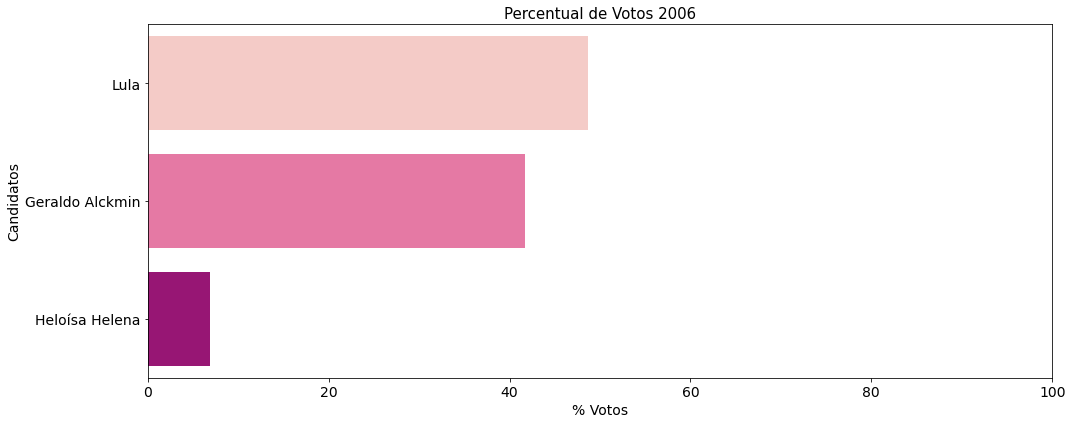

In [31]:
top_candidados_ano(2006)